In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
#path_data = os.path.dirname(__file__) # no funciona en jupyter
path_data = os.path.abspath('')
path_data

'/home/valengou/code/juanpedrobesenyi/cyberbullying/notebooks/valen'

In [4]:
path_raw_data = os.path.join(path_data, '../../raw_data/')
path_raw_data

'/home/valengou/code/juanpedrobesenyi/cyberbullying/notebooks/valen/../../raw_data/'

In [5]:
file = 'toxicity_parsed_dataset.csv'
df = pd.read_csv(path_raw_data+file, usecols=['Text', 'oh_label'])
df.rename(columns={'Text':'text', 'oh_label':'target'}, inplace=True)
df.head()

,text,target
0,This: :One can make an analogy in mathematical...,0
1,` :Clarification for you (and Zundark's righ...,0
2,Elected or Electoral? JHK,0
3,`This is such a fun entry. Devotchka I once...,0
4,Please relate the ozone hole to increases in c...,0


In [6]:
df.shape

(159686, 2)

In [7]:
def clean_data(text,
               remove_punctuation=True,
               lower_text=True,
               remove_numbers=True,
               remove_stopwords=False, 
               lemmatize=False):
    
    text = str(text)
    
    # replace emojis with text
    #text = demoji.replace_with_desc(text, ' ')
    
    # remove punctuation
    if remove_punctuation:
        for punctuation in string.punctuation:
            text = text.replace(punctuation, '')
    
    # lower text
    if lower_text:
        text = text.lower()
    
    # remove numbers
    if remove_numbers:
        text = ''.join([w for w in text if not w.isdigit()])
    
    # remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        text = ' '.join([w for w in word_tokens if not w in stop_words])
    
    # lemmatize
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        text = ''.join([lemmatizer.lemmatize(word) for word in text]) # no entiendo por qué no va un espacio
    
    return text

In [8]:
def clean_df(df, 
            remove_punctuation=True,
            lower_text=True,
            remove_numbers=True,
            remove_stopwords=False, 
            lemmatize=False):
    
    df = df.copy()
    
    df = df.drop_duplicates()
    
    df['text'] = df['text'].apply(lambda text: clean_data(text,
                                                          remove_punctuation,
                                                          lower_text,
                                                          remove_numbers,
                                                          remove_stopwords,
                                                          lemmatize))
    
    df = df.drop_duplicates()
    
    df = df.replace(['', ' '], np.nan)
    df = df.dropna().reset_index(drop=True)
    
    return df

In [9]:
%%time
df = clean_df(df)
df.head()

CPU times: user 8.18 s, sys: 90.3 ms, total: 8.27 s
Wall time: 8.26 s


,text,target
0,this one can make an analogy in mathematical t...,0
1,clarification for you and zundarks right i ...,0
2,elected or electoral jhk,0
3,this is such a fun entry devotchka i once h...,0
4,please relate the ozone hole to increases in c...,0


In [10]:
df.shape

(158883, 2)

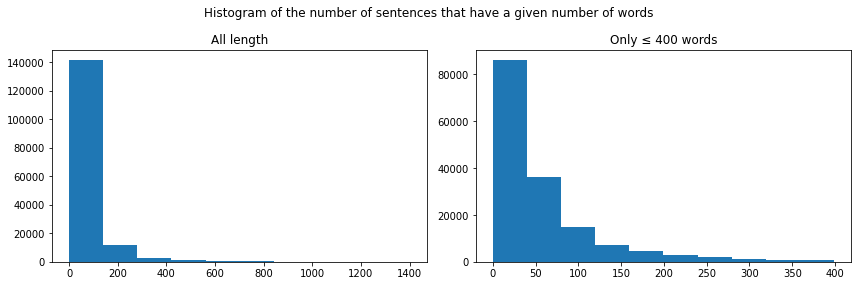

In [11]:
def plot_hist(X):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    len_ = [len(_.split()) for _ in X]
    ax1.hist(len_)
    ax1.set_title('All length')
    
    n = 400
    
    len_2 = [_ for _ in len_ if _ < n]
    ax2.hist(len_2)
    ax2.set_title(f'Only ≤ {n} words')
    
    plt.suptitle('Histogram of the number of sentences that have a given number of words')
    plt.tight_layout(pad=1)
    plt.show()
    
plot_hist(df['text'])

In [12]:
%%time
#df['text'] = df['text'].map(clean_data)
#df['text'] = df['text'].map(lambda x: x[:500])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs


In [13]:
df.to_csv('../../cyberbullying/data/data.csv', index=False)

In [ ]:
%%time
df_lem = clean_df(df, remove_punctuation=False, lower_text=False, remove_numbers=False, remove_stopwords=True, lemmatize=True)
df_lem.head()

In [ ]:
df_lem.shape

In [ ]:
df_lem.to_csv('../../cyberbullying/data/data_lem.csv', index=False)

In [ ]:
df_lem.head()

In [ ]:

for words in text:
    
